# Iniciando na Competição Digit Recognizer

[LINK DA COMPETIÇÃO](https://www.kaggle.com/c/digit-recognizer)

## Imports

In [60]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

## Pegando os dados

In [2]:
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Não há dados faltando, felizmente.

In [5]:
df_train.isnull().sum().sum()

0

## Visualizando

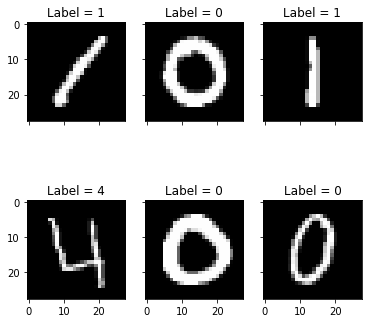

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(6, 6))
for i, ax in enumerate(axs.flatten()):
    image = df_train.iloc[i, 1:].values
    ax.set_title(f'Label = {df_train.iloc[i, 0]}')
    ax.imshow(image.reshape((28,28)), cmap='gray')

Não conseguimos perceber bem as diferenças entre os mesmos labels

In [16]:
samples_per_digit = 5

In [17]:
digits_dict = {
    digit: df_train[df_train['label'] == digit].iloc[:samples_per_digit, 1:] for digit in np.arange(10, dtype=int)
}

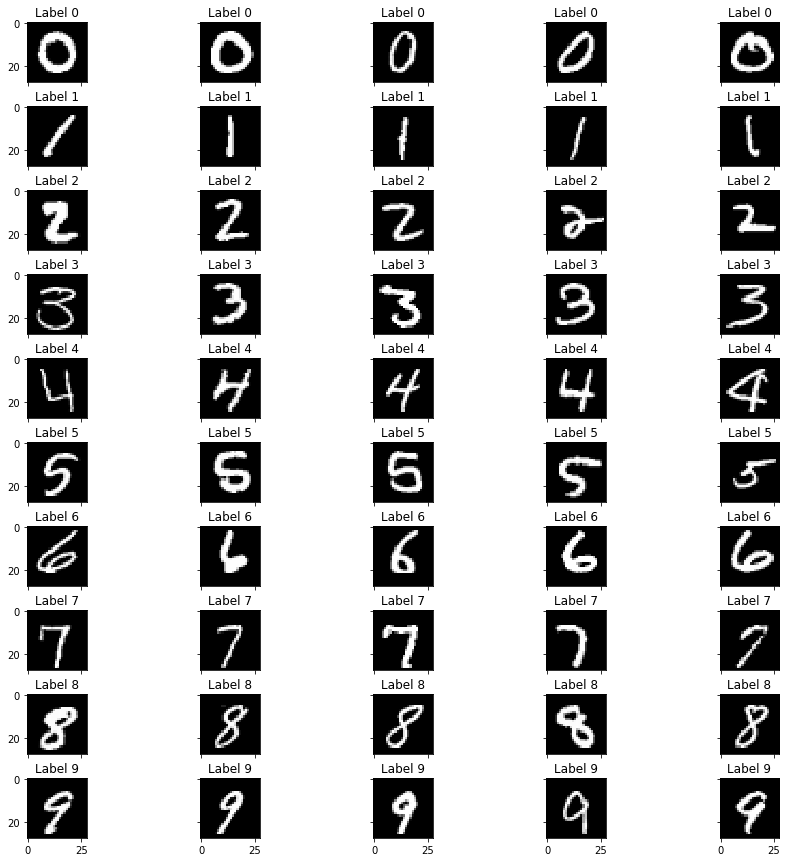

In [25]:
fig, axs = plt.subplots(nrows=10, ncols=samples_per_digit, sharex=True, sharey=True, figsize=(15,15))
fig.subplots_adjust(hspace=0.4)
for digit, df in digits_dict.items():
    for i in range(samples_per_digit):
        axs[digit, i].set_title(f'Label {digit}')
        axs[digit, i].imshow(df.iloc[i].values.reshape((28,28)), cmap='gray')

## Checando a representatividade

<BarContainer object of 10 artists>

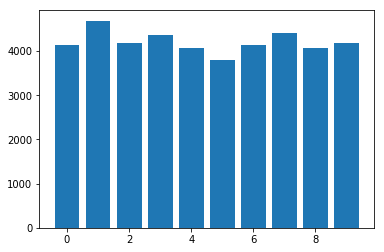

In [42]:
train_distribution = dict(df_train['label'].value_counts())
plt.bar(train_distribution.keys(), train_distribution.values())

## Olhando o teste

In [43]:
df_test = pd.read_csv('data/test.csv')

A coluna faltante é do label

In [45]:
df_test.shape, df_train.shape

((28000, 784), (42000, 785))

Também não existe informação faltante

In [47]:
df_test.isnull().sum().sum()

0

## Criando o conjunto de validação

In [48]:
samples_per_digit_val = 500

In [50]:
digits_dict_train = {
    digit: df_train[df_train['label'] == digit].iloc[:-samples_per_digit_val,:] for digit in np.arange(10, dtype=int)
}

In [56]:
digits_dict_val = {
    digit: df_train[df_train['label'] == digit].iloc[-samples_per_digit_val:,:] for digit in np.arange(10, dtype=int)
}

In [52]:
sum([len(df) for df in digits_dict_train.values()] + [len(df) for df in digits_dict_test.values()])

42000

Ok

In [57]:
new_df_train = pd.concat(digits_dict_train.values())
df_val = pd.concat(digits_dict_val.values())

In [59]:
new_df_train.shape, df_val.shape

((37000, 785), (5000, 785))

## Misturando as linhas

In [61]:
new_df_train = new_df_train.sample(frac=1).reset_index(drop=True)
df_val = df_val.sample(frac=1).reset_index(drop=True)

## Salvando em HDF5

In [63]:
with h5py.File('data/dataset.h5', 'w') as file:
    ## treino
    file.create_dataset('samples_train', data=new_df_train.iloc[:,1:], dtype=np.float32)
    file.create_dataset('labels_train', data=new_df_train.iloc[:,0], dtype=int)
    ## validação
    file.create_dataset('samples_val', data=df_val.iloc[:,1:], dtype=np.float32)
    file.create_dataset('labels_val', data=df_val.iloc[:,0], dtype=int)
    ## teste
    file.create_dataset('samples_test', data=df_test.values, dtype=np.float32)